In [1]:
%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1588563962398_0008,pyspark,dead,Link,,


# Analysis of Yelp Business Intelligence Data
This project is to analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset). Dataset is pulled into a public s3 bucket: s3://yelp-reviews-businesses-datasets/yelp_academic_dataset_business.json

# Part I: Installation and Initial Setup
Begin by installing the necessary libraries that needed to conduct analysis. 

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
8,application_1588563962398_0009,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

In [3]:
sc.install_pypi_package("IPython==7.12.0")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached ipython-7.12.0-py3-none-any.whl (777 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached pexpect-4.8.0-py2.py3-none-any.whl (59 kB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached Pygments-2.6.1-py3-none-any.whl (914 kB)
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)
Processing /mnt/var/lib/livy/.cache/pip/wheels/b4/cb/f1/d142b3bb45d488612cf3943d8a1db090eb95e6687045ba61d1/backcall-0.1.0-py3-none-any.whl
  Using cached prompt_toolkit-3.0.5-py3-none-any.whl (351 kB)
  Using cached jedi-0.17.0-py2.py3-none-any.whl (1.1 MB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached ptyprocess-0.6.0-py2.py3-none-any.whl (39 kB)
  Using cached wcwidth-0.1.9-py2.py3-none-any.whl (19 kB)
  Using cached parso-0.7.0-py2.py3-none-any.whl (100 kB)

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Usi

# Importing
Now, import the installed packages from the previous block below.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython
from IPython.display import display, Image
from pyspark.sql import functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data
Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [82]:
df_business_raw = spark.read.json( 's3://yelp-reviews-businesses-datasets/yelp_academic_dataset_business.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data
Display the number of rows and columns in the dataset.  
Display the DataFrame schema below.

In [6]:
print(f'Total Colums:{len(df_business_raw.dtypes)}')
print(f'Total Rows:{df_business_raw.count():,}')
df_business_raw.printSchema()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Colums:14
Total Rows:209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = 

### Display the first 5 rows with the following columns:

*  business_id  
*  name  
*  city  
*  state  
*  categories  

In [83]:
df_business_raw.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Part II: Analyzing Categories
Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as Active Life, for instance
* What are the top 20 most popular categories available?

## Association Table


In [84]:
from pyspark.sql.functions import split, explode
df_business = df_business_raw.withColumn('category',
                                     explode(split('categories',', ')))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [85]:
df_business.select('business_id','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Number of Unique Categories

What is the total number of unique categories available?



In [86]:
df_business.select("category").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|     Dermatologists|
|   Historical Tours|
|Mobile Home Dealers|
|     Paddleboarding|
|   Hot Air Balloons|
|       Aerial Tours|
|      Skating Rinks|
|  Signature Cuisine|
|             Fondue|
|      Data Recovery|
|  Pet Waste Removal|
|      Videographers|
|    Pet Photography|
|        Boat Repair|
|            Beaches|
|       Contract Law|
|        Hobby Shops|
|           Day Spas|
|              Reiki|
|           Honduran|
+-------------------+
only showing top 20 rows

## Top Categories By Business


### Counts of Businesses / Category

In [87]:
cat = df_business.groupby("category").count()
cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

In [39]:
cat_df = cat.toPandas()
cat_df.sort_values('count',inplace=True)
cat_df=cat_df.tail(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

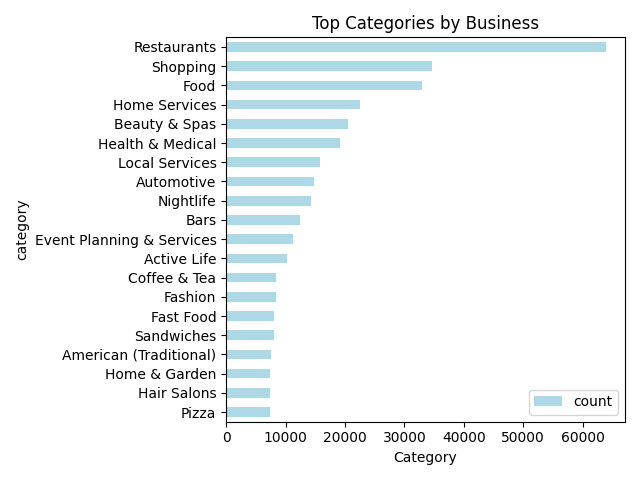

In [45]:
fig = plt.figure()

cat_df.plot(kind='barh',y='count',x='category',
            color='lightblue',title='Top Categories by Business',
            fontsize=10)
plt.xlabel('Count')
plt.xlabel('Category')
plt.tight_layout()
%matplot plt


# Part III: Do Yelp Reviews biased from the average rating?
Is it true that people who write a review are those who are more dissatisfied or more satisfied with the service received.


## Loading Review Data
Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [15]:
df_review = spark.read.json('s3://yelp-reviews-businesses-datasets/yelp_academic_dataset_review.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
print(f'Total Colums:{len(df_review.dtypes)}')
print(f'Total Rows:{df_review.count():,}')
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Colums:9
Total Rows:8,021,122
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.



In [17]:
df_review.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.



In [78]:
avg_starts = df_review.groupBy("business_id").agg({'stars':'avg'})
avg_starts.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Now let's join our two dataframes (reviews and business data) by business_id.



In [88]:
joindf = avg_starts.join(df_business_raw,'business_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
print(f'Total Rows:{joindf.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Rows:209,393

In [90]:
joindf.select('avg(stars)','stars','name','city','state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|        avg(stars)|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

Compute a new data frame that calculates what is called the deviation between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

Calculated as follows: ```(row['avg(stars)'] - row['stars']) / row['stars']```

If the deviation is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [91]:
skewness_stars=joindf.select((joindf["avg(stars)"]-joindf["stars"])/joindf["stars"])
skewness_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------+
|((avg(stars) - stars) / stars)|
+------------------------------+
|          -0.01893287435456...|
|          0.009041591320072382|
|          -0.01818181818181...|
|          -0.02521008403361...|
|          -0.02950819672131...|
+------------------------------+
only showing top 5 rows

In [92]:
skewness = skewness_stars.groupby('((avg(stars) - stars) / stars)').count()
skewness.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------+-----+
|((avg(stars) - stars) / stars)|count|
+------------------------------+-----+
|           0.01658163265306123|    1|
|          0.027848101265822756|    6|
|          -0.03391232423490494|    1|
|          -0.05723905723905...|    7|
|          -0.04145936981757872|    4|
+------------------------------+-----+
only showing top 5 rows

And finally, graph it!


In [93]:
sk_df = skewness_stars.toPandas()
sk_df.columns=['skew']


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

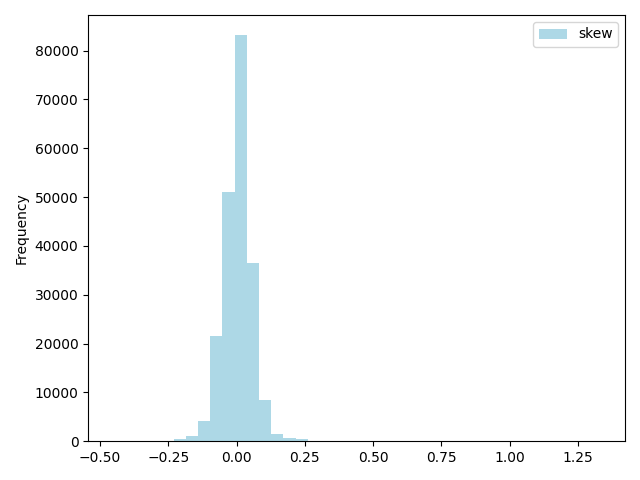

In [94]:
sk_df.plot(kind='hist', color='lightblue',bins=40)
plt.tight_layout()
%matplot plt

We can see that the distribution is like a normal distribution and the variance is quite small. Thus, it may not be true that  people who write a review are those who are more dissatisfied or more satisfied with the service received.


# Part IV: Analyzing Users

In [51]:
df_user = spark.read.json('s3://yelp-reviews-businesses-datasets/yelp_academic_dataset_user.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
print(f'Total Colums:{len(df_user.dtypes)}')
print(f'Total Rows:{df_user.count():,}')
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Colums:22
Total Rows:1,968,703
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [53]:
split_col = F.split(df_user['yelping_since'], '-')
df_user = df_user.withColumn('year', split_col.getItem(0))
df_user = df_user.withColumn('month', split_col.getItem(1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
df_user.select('year','month').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|year|month|
+----+-----+
|2007|   07|
|2008|   04|
|2008|   08|
|2008|   09|
|2008|   08|
+----+-----+
only showing top 5 rows

In [55]:
# How many years has each user been using yelp?

no_yr=df_user.select(2020-df_user["year"]).groupby('(2020 - year)').count()
no_yr.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+------+
|(2020 - year)| count|
+-------------+------+
|          8.0|203180|
|          7.0|221380|
|          1.0| 75728|
|          4.0|241414|
|         11.0| 68314|
+-------------+------+
only showing top 5 rows

In [56]:
yr_df = no_yr.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## What are the number of users grouped by years of yelp used?


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

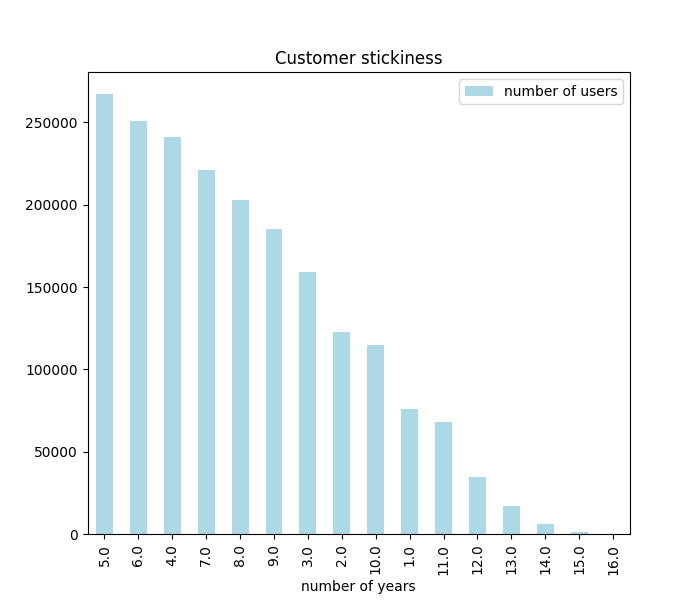

In [99]:
yr_df.columns = ['number of years','number of users']
yr_df = yr_df.sort_values('number of users',ascending=False)

yr_df.plot.bar(x='number of years', y='number of users',figsize=(7,6),title='Customer stickiness',color='lightblue')
%matplot plt

The graph above shows that most users have been using yelp for 4 to 6 years.

In [60]:
from pyspark.sql.window import Window
pc_yr = no_yr.withColumn('percent', 100*F.col('count')/F.sum('count').over(Window.partitionBy()))
pc_yr.orderBy('percent', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+------+--------------------+
|(2020 - year)| count|             percent|
+-------------+------+--------------------+
|          5.0|267267|   13.57579076173501|
|          6.0|250827|  12.740723207106404|
|          4.0|241414|  12.262591157731766|
|          7.0|221380|  11.244966863970848|
|          8.0|203180|  10.320500349722634|
|          9.0|185076|   9.400910142362763|
|          3.0|158881|     8.0703386950698|
|          2.0|122892|   6.242282355439088|
|         10.0|115106|   5.846793548849166|
|          1.0| 75728|  3.8465934170872904|
|         11.0| 68314|   3.470000299689694|
|         12.0| 34327|  1.7436352766262864|
|         13.0| 17155|  0.8713858819740713|
|         14.0|  6052| 0.30741051341924097|
|         15.0|  1022| 0.05191235041547659|
|         16.0|    82|0.004165178800458982|
+-------------+------+--------------------+

About 82% of the users have been using yelp for more than 4 years.  
About 10% are new users who have been using yelp for 1~2 years.

## States with Most Reviewers

### Join user, review and business dataset

In [95]:
rew_user = df_user.join(df_review,'user_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [97]:
rew_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = tru

In [112]:
bs_rew_user = rew_user.select('user_id','business_id').join(df_business_raw,'business_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
bs_rew_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable =

In [114]:
state_p = bs_rew_user.select('user_id','state').groupby('state').count()
state_p.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|state|  count|
+-----+-------+
|   AZ|2504395|
|   SC|  28581|
|   OR|      9|
|   VA|     27|
|   QC| 208166|
+-----+-------+
only showing top 5 rows

In [115]:
dp = state_p.toPandas()
dp = dp.sort_values('count',ascending=False).head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

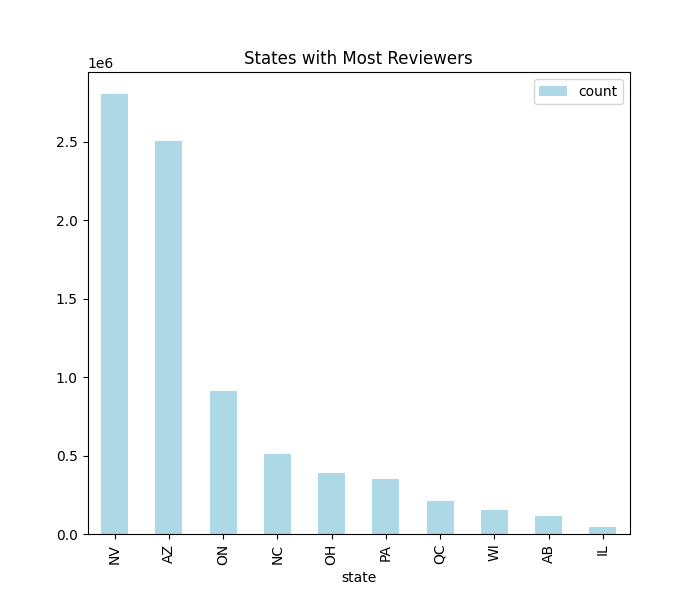

In [123]:
dp.plot.bar(x='state', y='count',figsize=(7,6),title='States with Most Reviewers',color='lightblue')
%matplot plt